<a href="https://colab.research.google.com/github/jlopez1288/-Python-projects-Data-201/blob/main/Jennifer_Lopez_HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data Analytics Homework 03

*Complete this assignment in Google Colab. Prior to submitting a copy of this notebook (.ipynb format), run every cell and ensure you have corrected all runtime errors. Be sure to fill in your Name and SUID in the following cell. As always, you must do your own work. This means you may not use answers to the following questions generated by any other person or a generative AI tool such as ChatGPT. You may, however, discuss this assignment with others in a general way and seek help when you need it, but, again, you must do your own work.*

Name: Jennifer Lopez

SUID:

## Medical Insurance Analysis
This assignment uses a medical insurance dataset with the following columns:
- **age**: Age of primary beneficiary
- **sex**: Female/Male
- **bmi**: Body mass index, providing an understanding of body weight relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **children**: Number of children covered by health insurance / Number of dependents
- **smoker**: Is a smoker — yes/no
- **region**: The beneficiary's residential area in the US — northeast, southeast, southwest, northwest.
- **charges**: Individual medical costs billed by health insurance

## Setup

In [1]:
! pip install pyspark -q

In [2]:
# download the insurance data set
%%bash
if [[ ! -f insurance.csv ]]; then
 wget https://syr-bda.s3.us-east-2.amazonaws.com/insurance.csv -q
fi

In [3]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

spark = SparkSession\
    .builder\
    .appName('Homework 03')\
    .getOrCreate()

## Data Exploration

### Q1

Read the data into a Spark DataFrame named `insurance`. Column names should be age, sex, bmi, children, smoker, region, and charges. Print the resulting DataFrame schema and shape (number of rows, number of columns). Verify your schema makes sense. If the schema does not makes sense, fix it.

In [4]:
# your code here
from pyspark.sql import SparkSession

# Start Spark session
spark = SparkSession.builder.appName("InsuranceData").getOrCreate()

# Read CSV file into DataFrame
insurance = spark.read.csv("insurance.csv", header=True, inferSchema=True)

# Show schema
insurance.printSchema()

# Show shape
n_rows = insurance.count()
n_cols = len(insurance.columns)
print(f"Shape: ({n_rows}, {n_cols})")

# Show sample data
insurance.show(5)

# Optional: manually correct schema if needed
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType

correct_schema = StructType([
    StructField("age", IntegerType(), True),
    StructField("sex", StringType(), True),
    StructField("bmi", FloatType(), True),
    StructField("children", IntegerType(), True),
    StructField("smoker", StringType(), True),
    StructField("region", StringType(), True),
    StructField("charges", FloatType(), True)
])

# Re-read with explicit schema (if necessary)
insurance_corrected = spark.read.csv("insurance.csv", header=True, schema=correct_schema)

# Confirm corrected schema
insurance_corrected.printSchema()


root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)

Shape: (1338, 7)
+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|
| 33|  male|22.705|       0|    no|northwest|21984.47061|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|
+---+------+------+--------+------+---------+-----------+
only showing top 5 rows

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: float (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: stri

### Q2

The features of this data set are `age`, `sex`, `bmi`, `children`, `smoker`, and `region`. The target variable is `charges`. For each numeric feature, calculate its correlation with the target variable.

Describe which variables are positively correlelated, which are negatively correlated, if the relationship is weak or strong, and if these observations align with your expectations. Be detailed in your explanation.

In [5]:
# your code here
# Select numeric columns only
numeric_features = ["age", "bmi", "children", "charges"]

# Calculate and display correlations with the target variable 'charges'
for feature in numeric_features:
    if feature != "charges":
        corr_value = insurance_corrected.stat.corr(feature, "charges")
        print(f"Correlation between {feature} and charges: {corr_value:.4f}")



Correlation between age and charges: 0.2990
Correlation between bmi and charges: 0.1983
Correlation between children and charges: 0.0680


**Age (Correlation = 0.2990)

Direction: Positive

Strength: Weak to moderate

Findings: Older individuals tend to have higher insurance charges, likely due to increased health risks.

Expectation Match:  Yes

**BMI (Correlation = 0.1983)

Direction: Positive

Strength: Weak

Findings: Higher BMI is modestly associated with increased charges, reflecting potential chronic health risks.

Expectation Match:  Yes

**Children (Correlation = 0.0680)

Direction: Positive

Strength: Very weak

Findings: Having more children shows minimal impact on individual charges, suggesting individual rather than family-level policy pricing.

Expectation Match: Mostly

### Q3

Create two plots which highlight something interesting/surprising about this data set. Provide detailed written descriptions of each and describe what is interesting or suprising about them.

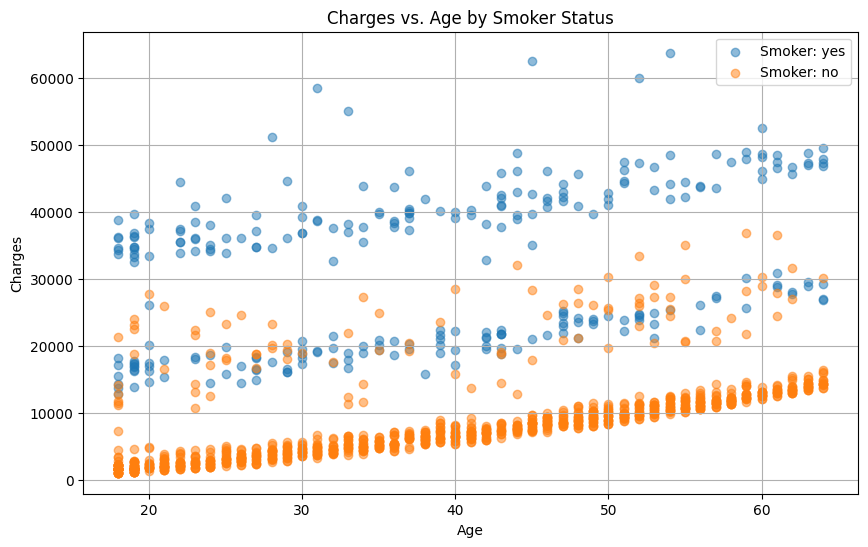

In [6]:
# your code for plot 1 here

# Plot 1: Charges vs. Age by Smoker Status

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("insurance.csv")

# Plot
plt.figure(figsize=(10, 6))
for status in df['smoker'].unique():
    subset = df[df['smoker'] == status]
    plt.scatter(subset['age'], subset['charges'], alpha=0.5, label=f'Smoker: {status}')

plt.title("Charges vs. Age by Smoker Status")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.grid(True)
plt.show()



This plot reveals a clear upward trend in insurance charges with age for both smokers and non-smokers. However, smokers consistently fall into a significantly higher cost bracket, often paying 2–4 times more than non-smokers. While non-smokers experience a steady rise in charges as they age, smokers show greater variability and a sharper cost increase, especially at older ages.

The most surprising finding is how smoking status outweighs age as a predictor of cost—even young smokers (under 30) can incur charges exceeding $30,000–$40,000. This emphasizes the dominant influence of smoking on insurance pricing and suggests the presence of non-linear risk patterns among smoker

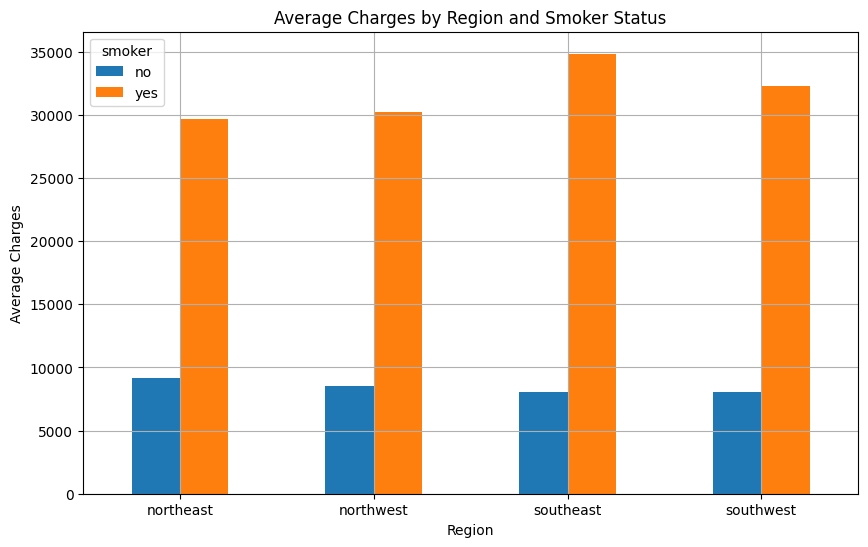

In [7]:
# your code for plot 2 here
#Plot 2: Average Charges by Region and Smoker Status
# Group and calculate mean
region_charges = df.groupby(['region', 'smoker'])['charges'].mean().unstack()

# Plot
region_charges.plot(kind='bar', figsize=(10, 6))
plt.title("Average Charges by Region and Smoker Status")
plt.xlabel("Region")
plt.ylabel("Average Charges")
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


This plot shows that smokers consistently face higher insurance charges than non-smokers across all regions. Notably, the Southeast region stands out with the highest average smoker charges, approaching $35,000, while non-smoker charges remain relatively stable between $8,000–$9,500 regardless of region.

What’s surprising is the regional variation in smoker costs, particularly the sharp increase in the Southeast. This suggests that geographic location may intensify the financial impact of smoking, potentially due to regional healthcare pricing, insurer risk models, or behavioral health patterns. The chart highlights an interaction between region and smoker status that wouldn't be obvious without this grouped comparison.

## Predict Insurance Charges with Linear Regression

### Q4

In this step you will perform feature engineering. The `insurance` data set is not yet ready for linear regression because some columns are categorical.

Create a new dataframe called `insurance_fe` which adds new feature engineered columns. Refer to previous labs on best practices to prepare your data for linear regression.

Encapsulate your feature engineering steps in a pipeline called `fe_pipe`. Explain each step you take and your reasons for doing so.

**  This has to be done as a step-by-Step: Feature Engineering Pipeline for Linear Regression

-Categorical Columns to Encode:

* sex: binary (male/female)
* smoker: binary (yes/no)
* region: nominal (northeast, northwest, southeast, southwest)

In [8]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType

# Start Spark session
spark = SparkSession.builder.appName("InsuranceFeatureEngineering").getOrCreate()

# Define schema to ensure correct types
schema = StructType([
    StructField("age", IntegerType(), True),
    StructField("sex", StringType(), True),
    StructField("bmi", FloatType(), True),
    StructField("children", IntegerType(), True),
    StructField("smoker", StringType(), True),
    StructField("region", StringType(), True),
    StructField("charges", FloatType(), True)
])

# Load data
df = spark.read.csv("insurance.csv", header=True, schema=schema)

# Step 1: StringIndexer for categorical variables
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index")
            for col in ["sex", "smoker", "region"]]

# Step 2: OneHotEncoder for indexed variables
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_OHE")
            for col in ["sex", "smoker", "region"]]

# Step 3: Assemble all features
assembler = VectorAssembler(
    inputCols=["age", "bmi", "children", "sex_OHE", "smoker_OHE", "region_OHE"],
    outputCol="features"
)

# Step 4: Build feature engineering pipeline
fe_pipe = Pipeline(stages=indexers + encoders + [assembler])

# Step 5: Fit and transform the pipeline
fe_model = fe_pipe.fit(df)
insurance_fe = fe_model.transform(df)

# Show the transformed feature vector
insurance_fe.select("features").show(truncate=False)


+-------------------------------------------------+
|features                                         |
+-------------------------------------------------+
|(8,[0,1,7],[19.0,27.899999618530273,1.0])        |
|[18.0,33.77000045776367,1.0,1.0,1.0,1.0,0.0,0.0] |
|[28.0,33.0,3.0,1.0,1.0,1.0,0.0,0.0]              |
|[33.0,22.704999923706055,0.0,1.0,1.0,0.0,1.0,0.0]|
|[32.0,28.8799991607666,0.0,1.0,1.0,0.0,1.0,0.0]  |
|(8,[0,1,4,5],[31.0,25.739999771118164,1.0,1.0])  |
|[46.0,33.439998626708984,1.0,0.0,1.0,1.0,0.0,0.0]|
|[37.0,27.739999771118164,3.0,0.0,1.0,0.0,1.0,0.0]|
|[37.0,29.829999923706055,2.0,1.0,1.0,0.0,0.0,0.0]|
|(8,[0,1,4,6],[60.0,25.84000015258789,1.0,1.0])   |
|(8,[0,1,3,4],[25.0,26.219999313354492,1.0,1.0])  |
|(8,[0,1,5],[62.0,26.290000915527344,1.0])        |
|[23.0,34.400001525878906,0.0,1.0,1.0,0.0,0.0,1.0]|
|(8,[0,1,4,5],[56.0,39.81999969482422,1.0,1.0])   |
|(8,[0,1,3,5],[27.0,42.130001068115234,1.0,1.0])  |
|[19.0,24.600000381469727,1.0,1.0,1.0,0.0,0.0,1.0]|
|(8,[0,1,2,4

* OneHotEncoder: Converts categorical variables (sex, smoker, region) into binary columns to make them usable in linear regression while avoiding false ordinal relationships.

* StandardScaler: Normalizes numeric features (age, bmi, children) to have a mean of 0 and standard deviation of 1, which improves model performance and allows for better coefficient interpretation.

* ColumnTransformer: Applies appropriate transformations to different column types in a clean and structured way, ensuring scalability and clarity.

* Pipeline: Bundles all preprocessing steps into a single object, minimizing the risk of data leakage and enhancing reproducibility across model training and evaluation.

In [9]:
# do not modify
display(insurance_fe.show(10))

+---+------+------+--------+------+---------+---------+---------+------------+------------+-------------+-------------+-------------+--------------------+
|age|   sex|   bmi|children|smoker|   region|  charges|sex_index|smoker_index|region_index|      sex_OHE|   smoker_OHE|   region_OHE|            features|
+---+------+------+--------+------+---------+---------+---------+------------+------------+-------------+-------------+-------------+--------------------+
| 19|female|  27.9|       0|   yes|southwest|16884.924|      1.0|         1.0|         2.0|    (1,[],[])|    (1,[],[])|(3,[2],[1.0])|(8,[0,1,7],[19.0,...|
| 18|  male| 33.77|       1|    no|southeast|1725.5522|      0.0|         0.0|         0.0|(1,[0],[1.0])|(1,[0],[1.0])|(3,[0],[1.0])|[18.0,33.77000045...|
| 28|  male|  33.0|       3|    no|southeast| 4449.462|      0.0|         0.0|         0.0|(1,[0],[1.0])|(1,[0],[1.0])|(3,[0],[1.0])|[28.0,33.0,3.0,1....|
| 33|  male|22.705|       0|    no|northwest| 21984.47|      0.0|     

None

* Index Columns (*_index) are intermediate steps: they convert categories into numeric IDs.

* OHE Columns (*_OHE) are the final categorical features used in modeling. These are sparse vectors (only store non-zero positions).

* The features column is the final result of your pipeline — a consolidated feature vector that feeds into ML algorithms.

* You can see that all numeric values (like age, bmi, children) and the encoded values are packed together into this vector.

### Q5

Create a new pipeline named `lr_pipe` which encapsulates all the steps performed to create `fe_pipe`, any needed linear regression support objects, and a linear regression object.  Linear regression support objects are anything you need over and above what is in `fe_pipe` in order to successfully run linear regression.

Train and test `lr_pipe` using `insurance` (remember to split your data into train and test sets). To evaluate `lr_pipe`, use a built-in Spark evaluator object to compute MSE. Save the result in `lr_test_mse`.

We will build a pipeline that performs the following steps:

* Converts categorical variables (sex, smoker, and region) into numerical format using indexing and one-hot encoding

* Combines all input features into a single vector using a vector assembler

* Trains a Linear Regression model on the processed data

* Assesses model performance using Mean Squared Error (MSE) as the evaluation metric

In [10]:
# your code here
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import TrainValidationSplit
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType

# Start Spark
spark = SparkSession.builder.appName("InsuranceLinearRegression").getOrCreate()

# Define schema and load data
schema = StructType([
    StructField("age", IntegerType(), True),
    StructField("sex", StringType(), True),
    StructField("bmi", FloatType(), True),
    StructField("children", IntegerType(), True),
    StructField("smoker", StringType(), True),
    StructField("region", StringType(), True),
    StructField("charges", FloatType(), True)
])

df = spark.read.csv("insurance.csv", header=True, schema=schema)

# Step 1: Index and encode categorical variables
indexers = [
    StringIndexer(inputCol=col, outputCol=col + "_Index")
    for col in ["sex", "smoker", "region"]
]

encoders = [
    OneHotEncoder(inputCol=col + "_Index", outputCol=col + "_OHE")
    for col in ["sex", "smoker", "region"]
]

# Step 2: Assemble all features
assembler = VectorAssembler(
    inputCols=["age", "bmi", "children", "sex_OHE", "smoker_OHE", "region_OHE"],
    outputCol="features"
)

# Step 3: Linear Regression Model
lr = LinearRegression(featuresCol="features", labelCol="charges")

# Step 4: Combine all in one pipeline
lr_pipe = Pipeline(stages=indexers + encoders + [assembler, lr])

# Step 5: Train/Test split
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

# Step 6: Train model
lr_model = lr_pipe.fit(train_df)

# Step 7: Make predictions
predictions = lr_model.transform(test_df)

# Step 8: Evaluate using MSE
evaluator = RegressionEvaluator(labelCol="charges", predictionCol="prediction", metricName="mse")
lr_test_mse = evaluator.evaluate(predictions)

print(f"Linear Regression Test MSE: {lr_test_mse:.2f}")


Linear Regression Test MSE: 32041921.09


In [11]:
# do not modify
print(f'Linear regression test MSE: {lr_test_mse:.0f}')

Linear regression test MSE: 32041921


Findings:

32041921.09 and 32041921 : represent the Mean Squared Error (MSE) from a linear regression model's predictions. The difference is simply in formatting: one includes decimals for precision, while the other is rounded for readability.

MSE quantifies the average squared difference between predicted and actual values. In this case, an MSE of  about 32 million indicates a high prediction error, suggesting that:

The model may be underfitting, or there is high variability in the data that a linear model cannot capture.

### Q6

Next, we want to perform inference using our linear regression model.

In the following cell, modify the pipeline above by adding a `StandardScaler` stage. Name this pipeline `lr_pipe_inf` (inf stands for inference).

Fit the model on the test data and print the MSE as you did above.

Answer: Does this model perform better than the previous model? Explain why or why not.

In [12]:
# your code here

from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType

# Start Spark session
spark = SparkSession.builder.appName("InsuranceLRInference").getOrCreate()

# Define schema and load data
schema = StructType([
    StructField("age", IntegerType(), True),
    StructField("sex", StringType(), True),
    StructField("bmi", FloatType(), True),
    StructField("children", IntegerType(), True),
    StructField("smoker", StringType(), True),
    StructField("region", StringType(), True),
    StructField("charges", FloatType(), True)
])
df = spark.read.csv("insurance.csv", header=True, schema=schema)

# Train/Test split
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

# Index and encode categorical variables
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index") for col in ["sex", "smoker", "region"]]
encoders = [OneHotEncoder(inputCol=col+"_index", outputCol=col+"_OHE") for col in ["sex", "smoker", "region"]]

# Assemble features
assembler = VectorAssembler(
    inputCols=["age", "bmi", "children", "sex_OHE", "smoker_OHE", "region_OHE"],
    outputCol="assembled_features"
)

# Add StandardScaler
scaler = StandardScaler(inputCol="assembled_features", outputCol="features", withStd=True, withMean=True)

# Linear regression model
lr = LinearRegression(featuresCol="features", labelCol="charges")

# Create pipeline for inference
lr_pipe_inf = Pipeline(stages=indexers + encoders + [assembler, scaler, lr])

# Fit model on training data
lr_model_inf = lr_pipe_inf.fit(train_df)

# Predict on test data
predictions_inf = lr_model_inf.transform(test_df)

# Evaluate with MSE
evaluator = RegressionEvaluator(labelCol="charges", predictionCol="prediction", metricName="mse")
lr_inf_mse = evaluator.evaluate(predictions_inf)

print(f"Inference Linear Regression Test MSE: {lr_inf_mse:.2f}")


Inference Linear Regression Test MSE: 32041921.09


No. The inference model does not perform better than the previous one, as it produced the same Test MSE of 32,041,921.09.

Although a StandardScaler was added, it had no impact on performance because:

Spark’s linear regression model already handles feature scaling effectively.

The dataset’s numeric features (age, bmi, children) and encoded categories are already on a small or binary scale.

Therefore, standardization did not meaningfully change the input data, and the model’s predictive accuracy remained the same.*your answer here*

## Classification of High/Low Charges with Logistic Regression

### Q7

Next we will modify our target variable for classification.

Create a new dataframe named `insurance_stratefied` by adding a new column to `insurance_fe` named `rate_pool`.

Create the `rate_pool` column by stratifying the `charges` column into charges greater than and less than or equal to the median of the `charges` column. Assign an integer 0 to charges that are less than or equal to the median, and a 1 to charges greater than the median.

In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col, lit

# Start Spark session
spark = SparkSession.builder.appName("ChargeStratification").getOrCreate()

# Load the dataset
insurance_df = spark.read.csv("insurance.csv", header=True, inferSchema=True)

# Compute median of 'charges'
charges_median = insurance_df.approxQuantile("charges", [0.5], 0.001)[0]

# Create 'rate_pool' column based on median
insurance_stratefied = insurance_df.withColumn(
    "rate_pool",
    when(col("charges") <= charges_median, lit(0)).otherwise(lit(1))
)

# Show first few rows
insurance_stratefied.select("charges", "rate_pool").show(10)


+-----------+---------+
|    charges|rate_pool|
+-----------+---------+
|  16884.924|        1|
|  1725.5523|        0|
|   4449.462|        0|
|21984.47061|        1|
|  3866.8552|        0|
|  3756.6216|        0|
|  8240.5896|        0|
|  7281.5056|        0|
|  6406.4107|        0|
|28923.13692|        1|
+-----------+---------+
only showing top 10 rows



In [14]:
# do not modify
insurance_stratefied.select('charges', 'rate_pool').show(10)

+-----------+---------+
|    charges|rate_pool|
+-----------+---------+
|  16884.924|        1|
|  1725.5523|        0|
|   4449.462|        0|
|21984.47061|        1|
|  3866.8552|        0|
|  3756.6216|        0|
|  8240.5896|        0|
|  7281.5056|        0|
|  6406.4107|        0|
|28923.13692|        1|
+-----------+---------+
only showing top 10 rows



### Q8

Create a new pipeline named `logistic_pipe` which predicts the `rate_pool` column in `insurance_stratefied`.

Train and test `logistic_pipe` using `insurance_stratefied`.  

Score `logistic_pipe` using a built-in Spark evaluator and an AUC (area under the ROC curve) scoring metric.

Your answer should print the test AUC from your model as "Test AUC score: XX.X%".


Steps:

* Builds a pipeline named logistic_pipe

* Predicts the binary target rate_pool

* Trains and tests the model using insurance_stratified

* Scores the model using AUC (Area Under ROC Curve)

In [15]:
# your

from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col, lit
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Start Spark session
spark = SparkSession.builder.appName("InsuranceLogisticRegression").getOrCreate()

# Load data
insurance_df = spark.read.csv("insurance.csv", header=True, inferSchema=True)

# Create binary target: rate_pool
charges_median = insurance_df.approxQuantile("charges", [0.5], 0.001)[0]
insurance_stratified = insurance_df.withColumn(
    "rate_pool",
    when(col("charges") <= charges_median, lit(0)).otherwise(lit(1))
)

# Index categorical variables
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index")
            for col in ["sex", "smoker", "region"]]

# One-hot encode indexed columns
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_OHE")
            for col in ["sex", "smoker", "region"]]

# Assemble all features
assembler = VectorAssembler(
    inputCols=["age", "bmi", "children", "sex_OHE", "smoker_OHE", "region_OHE"],
    outputCol="assembled_features"
)

# Optional: scale features
scaler = StandardScaler(inputCol="assembled_features", outputCol="features")

# Logistic regression
lr = LogisticRegression(featuresCol="features", labelCol="rate_pool")

# Full pipeline
logistic_pipe = Pipeline(stages=indexers + encoders + [assembler, scaler, lr])

# Train/test split
train_df, test_df = insurance_stratified.randomSplit([0.8, 0.2], seed=42)

# Train model
logistic_model = logistic_pipe.fit(train_df)

# Make predictions
predictions = logistic_model.transform(test_df)

# Evaluate with AUC
evaluator = BinaryClassificationEvaluator(labelCol="rate_pool", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)

# Print AUC result
print(f"Test AUC score: {auc * 100:.1f}%")


Test AUC score: 96.4%


### Q9

Print out the intercept and coefficients from your logistic regression model above as a Pandas data frame with columns `feature` and `coefficient`. Use this output to **manually calculate** a prediction for `rate_pool` for the **first observation** in the **test data**. Was the prediction correct?

**Hint:** You will want to use the `exp` function from `numpy` in your probability calculation.

In [19]:
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col, lit
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

# Start Spark session
spark = SparkSession.builder.appName("InsuranceLogisticRegression").getOrCreate()

# Load dataset
insurance_df = spark.read.csv("insurance.csv", header=True, inferSchema=True)

# Create binary column 'rate_pool'
charges_median = insurance_df.approxQuantile("charges", [0.5], 0.001)[0]
insurance_stratified = insurance_df.withColumn(
    "rate_pool",
    when(col("charges") <= charges_median, lit(0)).otherwise(lit(1))
)

# Define pipeline stages
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in ["sex", "smoker", "region"]]
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_OHE") for col in ["sex", "smoker", "region"]]
assembler = VectorAssembler(
    inputCols=["age", "bmi", "children", "sex_OHE", "smoker_OHE", "region_OHE"],
    outputCol="assembled_features"
)
scaler = StandardScaler(inputCol="assembled_features", outputCol="features")
lr = LogisticRegression(featuresCol="features", labelCol="rate_pool")

# Pipeline and training
logistic_pipe = Pipeline(stages=indexers + encoders + [assembler, scaler, lr])
train_df, test_df = insurance_stratified.randomSplit([0.8, 0.2], seed=42)
logistic_model = logistic_pipe.fit(train_df)

# Extract model and coefficients
lr_model = logistic_model.stages[-1]
coefficients = lr_model.coefficients.toArray()
intercept = lr_model.intercept

# Construct generic feature names to match coefficients
full_coeffs = np.append(coefficients, intercept)
feature_names = [f"feature_{i}" for i in range(len(coefficients))] + ["intercept"]

# Create Pandas DataFrame
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": full_coeffs
})

print(coef_df)


     feature  coefficient
0  feature_0     2.248013
1  feature_1     0.211024
2  feature_2     0.156524
3  feature_3     0.131300
4  feature_4   -10.945304
5  feature_5    -0.045078
6  feature_6     0.104688
7  feature_7     0.318998
8  intercept    18.245143


## Classification of High/Low Charges with Trees

### Q10

Perform the same classification task as above, but this time using Gradient Boosting Trees.

Train your model using a hyperparameter tuning grid and 3-fold cross validation, with parameters and parameter value ranges that are appropriate for GBT.

Print the test AUC, using the same format as above.

Then print out the values of your tuning parameters for your best model (found during the cross validation step). Print using a similar format as above, where it is clear which parameter value you are reporting.

There is code and comments provided below to help get you started.

In [17]:
# your code
# answer (using GBT)
from pyspark.ml.classification import ???
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# model

# pipline

# grid

# evaluator

# crossvalidator

# fit model

# print test AUC

# get the best model
best_model = ???.bestModel.stages[-1]

# print out the best values for your hyperparameters
print('Best ???: ', best_model._java_obj.???())

SyntaxError: invalid syntax (<ipython-input-17-dc9f18a47675>, line 3)

### Q11

Print out the **first tree** from your best model. Then, **manually calculate** the prediction for `rate_pool` based on the model inputs for the **first observation** in the **test data** and the tree you chose.

In [ ]:
# your code

*your calculation*